Here I will be doing an FST Grammar for my mother tongue: 'Galician'. 

In order to find more information about this language, you can take a look at these pages: https://es.wikipedia.org/wiki/Idioma_gallego#Descripción_lingü%C3%ADstica ; https://gl.wikisource.org/wiki/Normativa_oficial_do_galego_-_Formación_do_plural ; https://www.edu.xunta.gal/centros/iesfontexeria/aulavirtual/mod/book/view.php?id=3308&chapterid=750 ; http://www.edu.xunta.gal/centros/ceipraquelcamacho/system/files/VERBOS%20EN%20GALEGO%20MODELOS%20DAS%203%20CONXUGACIÓNS.pdf; https://es.wikibooks.org/wiki/Gallego/Gramática; https://2012.academia.gal/dicionario_rag/pc/verbos/correr.html ; https://academia.gal/dicionario/-/termo/busca/vivir


In [ ]:
!pip install pyfoma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


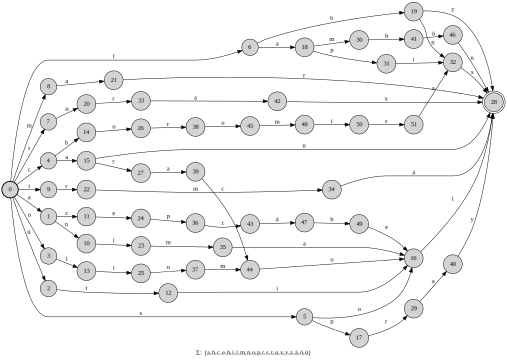

In [ ]:
# I will start with some nouns.
from pyfoma import *
fsts={}

fsts['nouns']= FST.re("irmá|spray|mar|luz|luns|choromicas|tórax|lapis|can|lambón|sol|caracol|animal|ollomol|útil|aceptábel")
#This is the meaning of these nouns respectively: sister, spray, sea, light, monday, crybaby, thorax, pencil, dog, sun, snail, animal, sea bream (a fish), useful, acceptable.
#There's not a great translation for 'lambón', but it's a person that really loves eating, specially sweets.

fsts['nouns'].view()


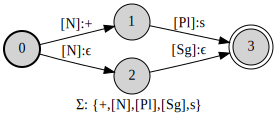

In [ ]:
#As in English, generally a lot of plurals are made by adding -s.
fsts['suffixes'] = FST.re("( '[N]' '[Sg]' ):'' | ( '[N]' '[Pl]' ):(\+s)")
fsts['suffixes'].view()

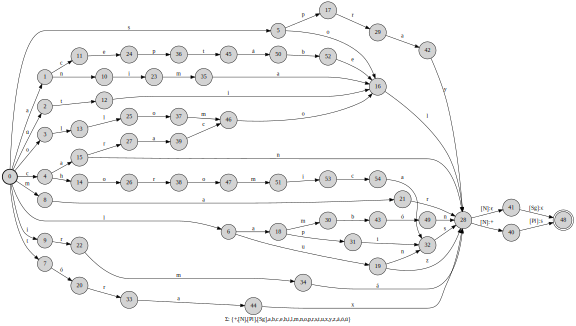

In [ ]:
fsts['lexicon'] = FST.re("$nouns $suffixes", fsts)
fsts['lexicon'].view()

In [ ]:
print(Paradigm(fsts['lexicon'], ".*"))

aceptábel   [N][Pl]  aceptábel+s   
aceptábel   [N][Sg]  aceptábel     
animal      [N][Pl]  animal+s      
animal      [N][Sg]  animal        
can         [N][Pl]  can+s         
can         [N][Sg]  can           
caracol     [N][Pl]  caracol+s     
caracol     [N][Sg]  caracol       
choromicas  [N][Pl]  choromicas+s  
choromicas  [N][Sg]  choromicas    
irmá        [N][Pl]  irmá+s        
irmá        [N][Sg]  irmá          
lambón      [N][Pl]  lambón+s      
lambón      [N][Sg]  lambón        
lapis       [N][Pl]  lapis+s       
lapis       [N][Sg]  lapis         
luns        [N][Pl]  luns+s        
luns        [N][Sg]  luns          
luz         [N][Pl]  luz+s         
luz         [N][Sg]  luz           
mar         [N][Pl]  mar+s         
mar         [N][Sg]  mar           
ollomol     [N][Pl]  ollomol+s     
ollomol     [N][Sg]  ollomol       
sol         [N][Pl]  sol+s         
sol         [N][Sg]  sol           
spray       [N][Pl]  spray+s       
spray       [N][Sg]  spray  

The formation of the plural can generally be done by adding an -s, but there are certain exceptions. In this section I will make a series of rules for the correct formation of the plural.
- The -s is added when:
  - When the word ends in vowel or diphthong.
  - When it ends in -n.
  - With foreign words.

Now I make the rules for the plurals that are not simply formed by adding '-s':
- Rule 1: When the word ends in z, to make the plural that z is replaced by a c.
- Rule 2: When ending in -r, -l or -z the plural is made by adding -es.
- Rule 3: There are words that do not add anything to make the plural, they remain the same, like 'lapis', 'tórax' and 'luns'.
- Rule 4: When the word ends in -bel, the plural is -beis. E.g.: aceptábel - aceptábeis, or dispoñíbel- dipoñíbeis.
- Rule 5: When words have an accent on the last syllable and are made up of more than one syllable, the plural is in -is: animal, caracol.

I finally had to change the order of some of the rules to make sense. I trust that the purpose of everything I have done is equally understood.

In [ ]:
fsts['rule1']= FST.re("$^rewrite('z':c/ _\+)")
fsts['rule2'] = FST.re("$^rewrite('':e/(c|r|z)_\+s)")
fsts['rule3'] = FST.re("$^rewrite(\+s:''/(lapis|tórax|luns|choromicas)_)")
fsts['rule4']= FST.re("$^rewrite('l':i/ _\+)") #I remove all the 'l' and change it with 'i', so then I have to make another rule for when this change is not neccesary (rule5)
fsts['rule5'] = FST.re("$^rewrite('':e/(mol|sol|útil)_\+s)")

fsts['cleanup'] = FST.re("$^rewrite('+':'')")

grammar= FST.re("$lexicon @ $rule5  @ $rule4 @ $rule1 @ $rule2 @ $rule3 @ $cleanup ", fsts)
#grammar.view()
print(Paradigm(grammar, ".*"))

aceptábel   [N][Pl]  aceptábeis  
aceptábel   [N][Sg]  aceptábel   
animal      [N][Pl]  animais     
animal      [N][Sg]  animal      
can         [N][Pl]  cans        
can         [N][Sg]  can         
caracol     [N][Pl]  caracois    
caracol     [N][Sg]  caracol     
choromicas  [N][Pl]  choromicas  
choromicas  [N][Sg]  choromicas  
irmá        [N][Pl]  irmás       
irmá        [N][Sg]  irmá        
lambón      [N][Pl]  lambóns     
lambón      [N][Sg]  lambón      
lapis       [N][Pl]  lapis       
lapis       [N][Sg]  lapis       
luns        [N][Pl]  luns        
luns        [N][Sg]  luns        
luz         [N][Pl]  luces       
luz         [N][Sg]  luz         
mar         [N][Pl]  mares       
mar         [N][Sg]  mar         
ollomol     [N][Pl]  ollomoles   
ollomol     [N][Sg]  ollomol     
sol         [N][Pl]  soles       
sol         [N][Sg]  sol         
spray       [N][Pl]  sprays      
spray       [N][Sg]  spray       
tórax       [N][Pl]  tórax       
tórax       [N

In this part I will focus on the grammar of verbs. To do this, it is necessary to know that in Galician there are three different conjugations, first, second and third, indicated by what is known as the thematic vowel. Thus, the verbs of the first conjugation have the thematic vowel -a, those of the second -e and those of the third -i. For this reason, I made a distinction between V, V2 and V3, each representing a conjugation, since, depending on the conjugation to which they belong, the endings change.


As a verb tense, I decided to use with each verb conjugation a different verb tense, because there are many and I would like to show a little bit of each one. For that purpose I have used two different past tenses and one future tense. 

As an irregular verb I have included 'vir' (come). I have done it manually, I don't know if there is another way to do it, but I understand that irregular verbs must be included in this way, as they don't follow a pattern.

In [ ]:
Grammar = {}
Grammar["S"] = [("", "Verb")]
Grammar["Verb"] = [("pensar", "V"), ("andar", "V"), ("correr", "V2"), ("vivir", "V3"), ("escribir", "V3")]



Grammar["V"] = [(("'[V]'", ""), "VInfl")]
Grammar["V2"]= [(("'[V2]'", ""), "VInfl2")]
Grammar["V3"]= [(("'[V3]'", ""), "VInfl3")]

Grammar["NInfl"] = [(("'[Pl]'", "+s"), "#"), (("'[Sg]'", ""), "#")]

Grammar["VInfl"] = [(("'[1p]''[Sg]''[Present]''[Ind]'", "+o"), "#"), \
                    (("'[2p]''[Sg]''[Present]''[Ind]'", "+s"), "#"), \
                    (("'[3p]''[Sg]''[Present]''[Ind]'", "+a"), "#"), \
                    (("'[1p]''[Pl]''[Present]''[Ind]'", "+mos"), "#"), \
                    (("'[2p]''[Pl]''[Present]''[Ind]'", "+des"), "#"), \
                    (("'[3p]''[Pl]''[Present]''[Ind]'", "+n"), "#"),]

Grammar["VInfl2"] = [(("'[1p]''[Sg]''[Present]''[Ind]'", "+o"), "#"), \
                    (("'[2p]''[Sg]''[Present]''[Ind]'", "+s"), "#"), \
                    (("'[3p]''[Sg]''[Present]''[Ind]'", "+e"), "#"), \
                    (("'[1p]''[Pl]''[Present]''[Ind]'", "+mos"), "#"), \
                    (("'[2p]''[Pl]''[Present]''[Ind]'", "+des"), "#"), \
                    (("'[3p]''[Pl]''[Present]''[Ind]'", "+n"), "#"),]

Grammar["VInfl3"] = [(("'[1p]''[Sg]''[Present]''[Ind]'", "+o"), "#"), \
                    (("'[2p]''[Sg]''[Present]''[Ind]'", "+s"), "#"), \
                    (("'[3p]''[Sg]''[Present]''[Ind]'", "+e"), "#"), \
                    (("'[1p]''[Pl]''[Present]''[Ind]'", "+mos"), "#"), \
                    (("'[2p]''[Pl]''[Present]''[Ind]'", "+des"), "#"), \
                    (("'[3p]''[Pl]''[Present]''[Ind]'", "+n"), "#"),]


Grammar["S"]+= [(("'vir' '[V3]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "veño"), "#"), \
                (("'vir' '[V3]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "vimos"), "#"), \
                (("'vir' '[V3]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "vés"), "#"), \
                (("'vir' '[V3]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "vi(n)des"), "#"), \
                (("'vir' '[V3]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "vén"), "#"), \
                (("'vir' '[V3]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "veñen"), "#")]

#For the past tense of the verbs of the first conjugation I used the 'copretérito', also known as 'pretérito imperfecto'.
#The verbs in this past tense will have the following endings:
Grammar["VInfl"] += [(("'[1p]''[Sg]''[Pret.imperf]''[Ind]'", "+aba"), "#"), \
                    (("'[2p]''[Sg]''[Pret.imperf]''[Ind]'", "+abas"), "#"), \
                    (("'[3p]''[Sg]''[Pret.imperf]''[Ind]'", "+aba"), "#"), \
                    (("'[1p]''[Pl]''[Pret.imperf]''[Ind]'", "+abamos"), "#"), \
                    (("'[2p]''[Pl]''[Pret.imperf]''[Ind]'", "+abades"), "#"), \
                    (("'[3p]''[Pl]''[Pret.imperf]''[Ind]'", "+aban"), "#"),]

#For the verb tense of verbs of the second conjugation I used the preterite perfect tense:
Grammar["VInfl2"] += [(("'[1p]''[Sg]''[Pret.perf]''[Ind]'", "+ín"), "#"), \
                    (("'[2p]''[Sg]''[Pret.perf]''[Ind]'", "+iches"), "#"), \
                    (("'[3p]''[Sg]''[Pret.perf]''[Ind]'", "+eu"), "#"), \
                    (("'[1p]''[Pl]''[Pret.perf]''[Ind]'", "+emos"), "#"), \
                    (("'[2p]''[Pl]''[Pret.perf]''[Ind]'", "+estes"), "#"), \
                    (("'[3p]''[Pl]''[Pret.perf]''[Ind]'", "+eron"), "#"),]

#Finally, for verbs of the third conjugation I used the future indicative:
Grammar["VInfl3"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+ei"), "#"), \
                    (("'[2p]''[Sg]''[Future]''[Ind]'", "+ás"), "#"), \
                    (("'[3p]''[Sg]''[Future]''[Ind]'", "+á"), "#"), \
                    (("'[1p]''[Pl]''[Future]''[Ind]'", "+emos"), "#"), \
                    (("'[2p]''[Pl]''[Future]''[Ind]'", "+edes"), "#"), \
                    (("'[3p]''[Pl]''[Future]''[Ind]'", "+án"), "#"),]

Lexicon = FST.rlg(Grammar, "S")
Lexicon = Lexicon.epsilon_remove().determinize().minimize()
Lexicon.view()
print(Paradigm(Lexicon, ".*"))

andar     [V][1p][Pl][Present][Ind]      andar+mos      
andar     [V][1p][Pl][Pret.imperf][Ind]  andar+abamos   
andar     [V][1p][Sg][Present][Ind]      andar+o        
andar     [V][1p][Sg][Pret.imperf][Ind]  andar+aba      
andar     [V][2p][Pl][Present][Ind]      andar+des      
andar     [V][2p][Pl][Pret.imperf][Ind]  andar+abades   
andar     [V][2p][Sg][Present][Ind]      andar+s        
andar     [V][2p][Sg][Pret.imperf][Ind]  andar+abas     
andar     [V][3p][Pl][Present][Ind]      andar+n        
andar     [V][3p][Pl][Pret.imperf][Ind]  andar+aban     
andar     [V][3p][Sg][Present][Ind]      andar+a        
andar     [V][3p][Sg][Pret.imperf][Ind]  andar+aba      
correr    [V2][1p][Pl][Present][Ind]     correr+mos     
correr    [V2][1p][Pl][Pret.perf][Ind]   correr+emos    
correr    [V2][1p][Sg][Present][Ind]     correr+o       
correr    [V2][1p][Sg][Pret.perf][Ind]   correr+ín      
correr    [V2][2p][Pl][Present][Ind]     correr+des     
correr    [V2][2p][Pl][Pret.per

The rules I have used are as follows:
- Rule1: remove the 'r' at the end of the word to add endings.
- Rule2: remove vowels when the ending starts with a vowel. Except with the 'u' so that it does not interfere with the preterite perfect of the verb 'to run'.
- Rule3: exclusively for verbs of the third conjugation. Necessary to replace 'i' with 'e' in the second person singular and third person plural.
- Rule4: For verbs of the second conjugation, so that in the preterite perfect when ending the first person singular and the second person singular the 'e' is not maintained.
- Rule1a: In order to keep the infinitive verb + the corresponding ending in the future tense


In [ ]:
fsts={}
fsts['Lexicon'] = Lexicon
fsts['rule1']= FST.re("$^rewrite('r':''/ _\+)")
fsts['rule1a']= FST.re("$^rewrite('':'r'/ _\+(ei|as|á|edes|emos))")
fsts['rule2'] = FST.re("$^rewrite([aeiou]:''/_\+(o|a|e))")
fsts['rule3']= FST.re("$^rewrite('i':e/ _\+(s|n))")
fsts['rule4']= FST.re("$^rewrite('e':''/ _\+(ín|iches))")
fsts['cleanup'] = FST.re("$^rewrite('+':'')")

grammar = FST.re("$Lexicon @ $rule1 @ $rule1a @ $rule2 @ $rule3 @ $rule4  @ $cleanup", fsts)
print(Paradigm(grammar, ".*"))

andar     [V][1p][Pl][Present][Ind]      andamos       
andar     [V][1p][Pl][Pret.imperf][Ind]  andabamos     
andar     [V][1p][Sg][Present][Ind]      ando          
andar     [V][1p][Sg][Pret.imperf][Ind]  andaba        
andar     [V][2p][Pl][Present][Ind]      andades       
andar     [V][2p][Pl][Pret.imperf][Ind]  andabades     
andar     [V][2p][Sg][Present][Ind]      andas         
andar     [V][2p][Sg][Pret.imperf][Ind]  andabas       
andar     [V][3p][Pl][Present][Ind]      andan         
andar     [V][3p][Pl][Pret.imperf][Ind]  andaban       
andar     [V][3p][Sg][Present][Ind]      anda          
andar     [V][3p][Sg][Pret.imperf][Ind]  andaba        
correr    [V2][1p][Pl][Present][Ind]     corremos      
correr    [V2][1p][Pl][Pret.perf][Ind]   correremos    
correr    [V2][1p][Sg][Present][Ind]     corro         
correr    [V2][1p][Sg][Pret.perf][Ind]   corrín        
correr    [V2][2p][Pl][Present][Ind]     corredes      
correr    [V2][2p][Pl][Pret.perf][Ind]   correst